In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# 100 trials on same set of 2 frames (sensor noise re-applied for each trial)
# Ground truth = [0.5, 0., 0., 0.0, 0.0, 0.1]
fn1 = "MC_results/s1_spherical_ICET_estimates.npy" 
fn2 = "MC_results/s1_spherical_ICET_pred_stds.npy"

# fn1 = "MC_results/s2_spherical_ICET_estimates_no_trees_with_rotation.npy" 
# fn2 = "MC_results/s2_spherical_ICET_pred_stds_no_trees_with_rotation.npy"

est = np.load(fn1)
pred_stds = np.load(fn2)

print(np.mean(pred_stds, axis = 0)[:3])
print(np.rad2deg(np.mean(pred_stds, axis = 0)[3:]))

# print(np.std(pred_stds, axis = 0)) #shows consistant prediction for soln std for constant scene

In [ ]:
#calc mean and std
mean = np.mean(est, axis = 0)
std = np.std(est, axis = 0)

print(mean)
print(std[:3])
print(np.rad2deg(std[3:]))

In [ ]:
#test - why does cov[0,0] give different results than std?????
#  answer: https://stackoverflow.com/questions/51923846/why-correlation-computed-by-nump-cov-and-np-std-is-different-from-the-result
# C = np.cov(est[:,0],est[:,1], ddof = 0) #need to include ddof arg
C = np.cov(est.T, ddof = 0) #need to include ddof arg
print(np.sqrt(abs(C)))

In [ ]:
#40 frame trajectory (3 iterations each pair)
# Ground truth = [0.5, 0., 0., 0.0, 0.0, 0.05]

# fn1 = "MC_results/traj1_cart_ICET_estimates_with_GP.npy" 
# fn2 = "MC_results/traj1_cart_ICET_pred_stds_with_GP.npy"
fn1 = "MC_results/traj1_cart_ICET_estimates_no_GP.npy" 
fn2 = "MC_results/traj1_cart_ICET_pred_stds_no_GP.npy"
# fn1 = "MC_results/traj1_spherical_ICET_estimates.npy" 
# fn2 = "MC_results/traj1_spherical_ICET_pred_stds.npy"
# fn1 = "MC_results/traj2_spherical_ICET_estimates.npy" 
# fn2 = "MC_results/traj2_spherical_ICET_pred_stds.npy"
# fn1 = "MC_results/traj2_cart_ICET_estimates.npy" 
# fn2 = "MC_results/traj2_cart_ICET_pred_stds.npy"
est = np.load(fn1)
pred_stds = np.load(fn2)

#just consider first 100----------------------
est = est[:100,:]
pred_stds = pred_stds[:100,:]
#---------------------------------------------

#remove outliers ~~~~~~~~~~~~~~~~~~~~~~~~~~~~
before = np.shape(est)[0]
#get rid of high translation errors
good = np.where(est[:,0] > 0.35) #0.35
est = est[good]
pred_stds = pred_stds[good]
good = np.where(est[:,0] < 0.65) #0.35
est = est[good]
pred_stds = pred_stds[good]
#get rid of high rotation errors
good = np.where(abs(est[:,5] < 0.08  ))
est = est[good]
pred_stds = pred_stds[good]
print("removed ", before - np.shape(est)[0], "outliers from ", before, "total estimates \n")
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
print(est[:,0])
print("Predicted STDs: \n",
    np.mean(pred_stds, axis = 0)[:3], np.rad2deg(np.mean(pred_stds, axis = 0)[3:]))
# print(np.mean(pred_stds, axis = 0)[:3],np.mean(pred_stds, axis = 0)[3:])

In [ ]:
#calc mean and std
mean = np.mean(est, axis = 0)
# print(mean)
std = np.std(est, axis = 0)

print(std[:3], np.rad2deg(std[3:]))
# print(std[:3], std[3:])

In [ ]:
#test removing points too close to the center from scan2 in cartesian ICET
#   DEBUGGING GROUND PLANE NEAR EGO-VEHICLE

t = np.linspace(0,11,12)
t = t.reshape([4,3])
print(t, "\n")

# print(t[t<3])
dist = np.sum(t**2, axis = 1)
print(t[dist < 100])

In [ ]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()
ax.plot(est[:,0])

In [ ]:
print(np.linspace(0,10,11))

In [ ]:
print(4%3)

<IPython.core.display.Javascript object>


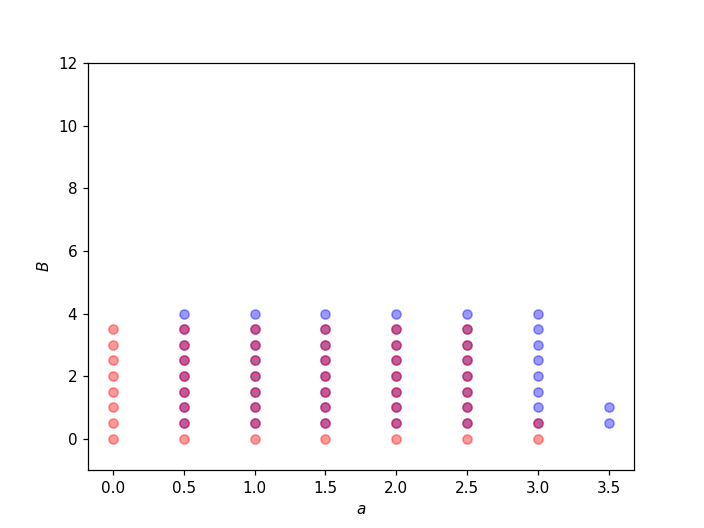

In [58]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook

#test indexing for spherical paper
npts = 50
x = np.linspace(0, npts-1, npts)
# x = np.linspace(1, npts, npts)
# print(x)
fig, ax = plt.subplots()
ax.set_ylim([-1,12])
ax.set_xlabel('$a$')
ax.set_ylabel('$B$')

ang_min = 0
ang_max = 4
deltaA = 0.5
deltaB = 0.5

for n in x:
    #horizontal angle (drawn left/ right here)
    num_vert_bins = (ang_max-ang_min)/deltaB #- 1
    a_min = (np.floor(n/num_vert_bins))*(deltaA)
    a_max = (1 + np.floor(n/num_vert_bins))*(deltaA)
    
    #elevation angle
    b_min = deltaB*(n%num_vert_bins)
    b_max = deltaB*(n%num_vert_bins + 1)

    ax.scatter(a_min, b_min, c = 'red', alpha = 0.4)
    ax.scatter(a_max, b_max, c = 'blue', alpha = 0.4)

    # print(int(num_vert_bins), "vertical bins")
